Testing the library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import aggregate
import matplotlib.pyplot as plt
import datacube
datacube.config.LocalConfig.db_database = 'wofstest'
datacube.config.LocalConfig.db_hostname = 'agdcstaging-db'
dc = datacube.Datacube()

In [3]:
lon = 143.83756, 143.88605
lat = -30.55194, -30.59073
stack = dc.load(product='wofs_albers', lat=lat, lon=lon)

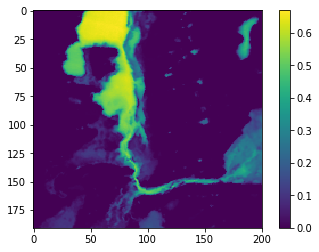

In [8]:
time, maskedwater = aggregate.WofsFuse().prefilter(stack.time.data, stack.water.data)
f = plt.figure()
plt.imshow(maskedwater.mean(axis=0))
plt.colorbar()
None

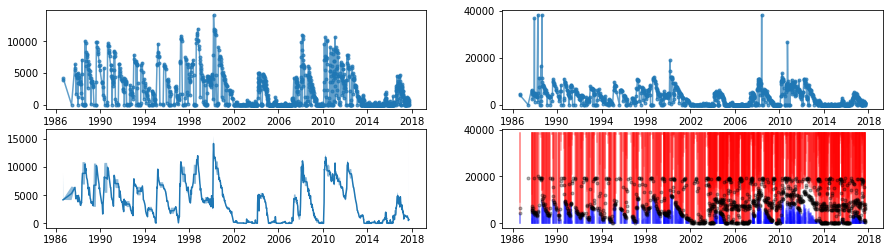

In [12]:
def fourplot(stack):
    timerange = stack.time.data[[0,-1]]
    fig, axes = plt.subplots(2,2)
    axes = axes.ravel()
    aggregate.Naive()(stack.water).lineplot(axes=axes[0])
    aggregate.Broken()(stack.water).lineplot(axes=axes[1])
    #aggregate.Bracket(timerange)(stack.water).envelopeplot(axes=axes[2])
    aggregate.Bracket()(stack.water).envelopeplot(axes=axes[2])
    aggregate.Conservative()(stack.water).discreteplot(axes=axes[3])
    fig.set_figwidth(15)
fourplot(stack)

KeyboardInterrupt: 

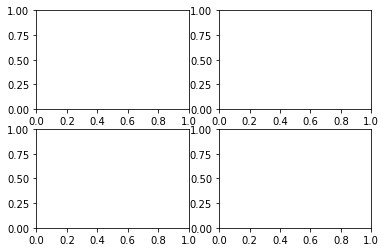

In [13]:
subset = stack.isel(time=slice(1150,1250))
fourplot(subset)

In [14]:
subset

<xarray.Dataset>
Dimensions:  (time: 100, x: 201, y: 191)
Coordinates:
  * time     (time) datetime64[ns] 2011-05-03T00:09:36.500000 ...
  * y        (y) float64 -3.377e+06 -3.377e+06 -3.377e+06 -3.377e+06 ...
  * x        (x) float64 1.122e+06 1.122e+06 1.122e+06 1.122e+06 1.122e+06 ...
Data variables:
    water    (time, y, x) uint8 64 64 64 64 66 66 66 66 66 66 66 66 66 66 66 ...
Attributes:
    crs:      EPSG:3577

In [15]:
time, maskedwater = aggregate.WofsFuse().prefilter(stack.time.data, stack.water.data)

In [16]:
time, maskedwater = aggregate.WofsFuse().prefilter(subset.time.data, subset.water.data)

In [25]:
aggregate.Bracket()(stack.water)

In [31]:
s = small.copy(deep=True)
aggregate.Bracket()(s)

AxisError: axis 1 is out of bounds for array of dimension 1

In [32]:
s

<xarray.DataArray 'water' (time: 10, y: 191, x: 201)>
array([[[ 66,  66, ...,  66,  66],
        [ 64,  64, ...,  64,  64],
        ..., 
        [ 64,  64, ...,  64,  64],
        [ 64,  64, ...,  64,  64]],

       [[130,   2, ..., 130, 130],
        [131, 131, ...,   0,   0],
        ..., 
        [  0,   0, ...,   0,   0],
        [  0,   0, ...,   0,   0]],

       ..., 
       [[ 74,  74, ..., 202,  74],
        [ 72,  72, ...,  74,  74],
        ..., 
        [203, 203, ...,  72,  72],
        [ 74,  74, ...,  74,  72]],

       [[202, 202, ..., 202,  74],
        [ 74,  74, ...,  72,  72],
        ..., 
        [ 74,  74, ..., 139, 139],
        [ 74,  74, ..., 139, 139]]], dtype=uint8)
Coordinates:
  * time     (time) datetime64[ns] 2011-05-03T00:09:36.500000 ...
  * y        (y) float64 -3.377e+06 -3.377e+06 -3.377e+06 -3.377e+06 ...
  * x        (x) float64 1.122e+06 1.122e+06 1.122e+06 1.122e+06 1.122e+06 ...
Attributes:
    nodata:            1
    units:             1
   

In [30]:
small = subset.water[:10,...]
small

<xarray.DataArray 'water' (time: 10, y: 191, x: 201)>
array([[[ 66,  66, ...,  66,  66],
        [ 64,  64, ...,  64,  64],
        ..., 
        [ 64,  64, ...,  64,  64],
        [ 64,  64, ...,  64,  64]],

       [[130,   2, ..., 130, 130],
        [131, 131, ...,   0,   0],
        ..., 
        [  0,   0, ...,   0,   0],
        [  0,   0, ...,   0,   0]],

       ..., 
       [[ 74,  74, ..., 202,  74],
        [ 72,  72, ...,  74,  74],
        ..., 
        [203, 203, ...,  72,  72],
        [ 74,  74, ...,  74,  72]],

       [[202, 202, ..., 202,  74],
        [ 74,  74, ...,  72,  72],
        ..., 
        [ 74,  74, ..., 139, 139],
        [ 74,  74, ..., 139, 139]]], dtype=uint8)
Coordinates:
  * time     (time) datetime64[ns] 2011-05-03T00:09:36.500000 ...
  * y        (y) float64 -3.377e+06 -3.377e+06 -3.377e+06 -3.377e+06 ...
  * x        (x) float64 1.122e+06 1.122e+06 1.122e+06 1.122e+06 1.122e+06 ...
Attributes:
    nodata:            1
    units:             1
   

In [24]:
subset

<xarray.Dataset>
Dimensions:  (time: 100, x: 201, y: 191)
Coordinates:
  * time     (time) datetime64[ns] 2011-05-03T00:09:36.500000 ...
  * y        (y) float64 -3.377e+06 -3.377e+06 -3.377e+06 -3.377e+06 ...
  * x        (x) float64 1.122e+06 1.122e+06 1.122e+06 1.122e+06 1.122e+06 ...
Data variables:
    water    (time, y, x) uint8 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 ...
Attributes:
    crs:      EPSG:3577

In [11]:
aggregate.Bracket()(subset.water).envelopeplot()
#aggregate.Conservative()(subset.water).discreteplot(marker=None)

TypeError: 'numpy.bool_' object does not support item assignment